In [194]:
import networkx as nx
import matplotlib.pyplot as plt
plt.xkcd()
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy import optimize
import statsmodels.api as sm
from scipy import stats

### Task 1.

Load [wordcounts](http://www.leonidzhukov.net/hse/2015/networks/data/wordcounts.txt) dataset. 
1. Check that Zipf's Law holds
2. Assuming that the data is distributed according to the Power Law, find
 * $\alpha$ of the distribution
 * mean sample variance $\sigma^2$
3. Produce summary of the frequencies: min, max, mean, median

In [3]:
wordcounts = np.array(list(np.loadtxt('wordcounts.txt', dtype = 'int32, a20')))
fr_w=list()
for i in range(len(wordcounts)-1):
    fr_w=np.append(fr_w,list(wordcounts[i])[0])

Check that Zipf's Law holds. We will use only part of our data because it was already sorted and if we plot directly we will have plot that will be hard to interpret. Anyway all other waluse will go farther through the tale. After ploting it looks like power law.

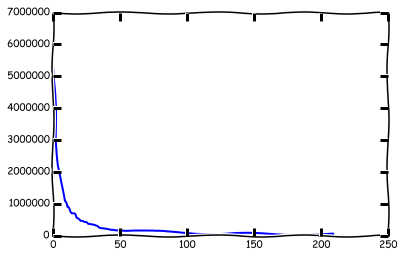

In [25]:
plt.plot(fr_w[0:(len(fr_w)-1)/30])

To estimate $\alpha$ we will use Max Liklehood approach it was already calculated in lecture 2 so we will just use the result of maximization.

In [26]:
alpha = 1 + len(fr_w)/np.sum(np.log(fr_w/min(fr_w)))
sigma_sq = (alpha - 1)/np.sqrt(len(fr_w))
print "alpha", alpha
print "sigma_sq", sigma_sq

alpha 1.71930376212
sigma_sq 0.0090501732544


Produce summary of the frequencies: min, max, mean, median

In [27]:
print 'min', min(fr_w)
print 'max', max(fr_w)
print 'mean', np.mean(fr_w)
print 'median', np.median(fr_w)

min 800.0
max 6187267.0
mean 13568.6917841
median 2335.0


### Task 2

In [174]:
routing_network = np.loadtxt('network.txt', comments='#', dtype = 'int32,int32')
G_rn = nx.Graph()
G_rn.add_edges_from(routing_network)
degrees_rn=np.array((G_rn.degree()).values())
web_graph = np.loadtxt('web_Stanford.txt', comments='#', dtype = 'int32,int32')
G_wg = nx.DiGraph()
G_wg.add_edges_from(web_graph)
degrees_in_wg=np.array((G_wg.in_degree()).values())
degrees_out_wg=np.array((G_wg.out_degree()).values())

1.Are they correspondent to power law? Histograms looks like powerlow (great amount of verticles with low degree and low amount with high degrees).

(array([ 466.,  165.,   92.,   61.,   40.,   27.,   12.,   13.,   10.,   14.]),
 array([ 10. ,  17.1,  24.2,  31.3,  38.4,  45.5,  52.6,  59.7,  66.8,
         73.9,  81. ]),
 <a list of 10 Patch objects>)

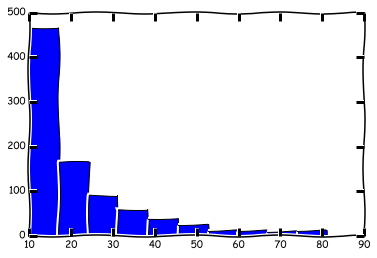

In [88]:
degrees_rn=sorted(degrees_rn,reverse=True)
plt.hist(degrees_rn[100:1000])

(array([  1.81500000e+03,   7.90000000e+01,   4.70000000e+01,
          2.20000000e+01,   2.00000000e+00,   5.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          8.00000000e+00]),
 array([   79. ,   905.7,  1732.4,  2559.1,  3385.8,  4212.5,  5039.2,
         5865.9,  6692.6,  7519.3,  8346. ]),
 <a list of 10 Patch objects>)

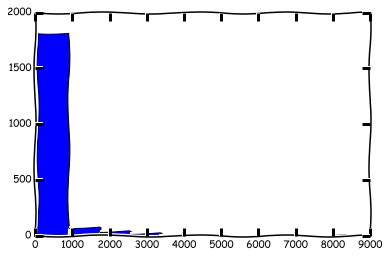

In [107]:
degrees_in_wg=sorted(degrees_in_wg,reverse=True)
plt.hist(degrees_in_wg[20:2000])

Find max and mean values of incoming and outcoming node degrees

In [93]:
print np.mean(degrees_rn), "degrees_rn_mean"
print np.max(degrees_rn), "degrees_rn_max"
print np.mean(degrees_in_wg), "degrees_in_wg_mean"
print np.max(degrees_in_wg), "degrees_in_wg_max"
print np.mean(degrees_out_wg), "degrees_out_wg_mean"
print np.max(degrees_out_wg), "degrees_out_wg_max"

4.21861255062 degrees_rn_mean
2390 degrees_rn_max
8.20316562789 degrees_in_wg_mean
38606 degrees_in_wg_max
8.20316562789 degrees_out_wg_mean
255 degrees_out_wg_max


Find $\alpha$ via Maximum Likelihood and calculate $\sigma^2$

For the first graph

In [99]:
alpha_rn = 1 + len(degrees_rn)/np.sum(np.log(degrees_rn/min(degrees_rn)))
sigma_rn = (alpha_rn - 1)/np.sqrt(len(degrees_rn))
print "alpha_rn", alpha_rn
print "sigma_rn", sigma_rn

alpha_rn 2.43517175294
sigma_rn 0.009470863233


For the second graph there was nodes with 0 degree so it was impossible to evaluate a. So we removed 0 and then evaluate optimal parameters. 

In [141]:
degrees_in_wg_ft=filter(lambda a: a >0, degrees_in_wg)
degrees_out_wg_ft=filter(lambda a: a >0, degrees_out_wg)
alpha_in_wg = 1 + len(degrees_in_wg_ft)/np.sum(np.log(degrees_in_wg_ft/min(degrees_in_wg_ft)))
sigma_in_wg = (alpha_in_wg - 1)/np.sqrt(len(degrees_in_wg_ft))
print "alpha_in_wg", alpha_in_wg
print "sigma_in_wg", sigma_in_wg
alpha_out_wg = 1 + len(degrees_out_wg_ft)/np.sum(np.log(degrees_out_wg_ft/min(degrees_out_wg_ft)))
sigma_out_wg = (alpha_out_wg - 1)/np.sqrt(len(degrees_out_wg_ft))
print "alpha_out_wg", alpha_out_wg
print "sigma_out_wg", sigma_out_wg

alpha_in_wg 1.95412784401
sigma_in_wg 0.00186551034276
alpha_out_wg 1.62618016321
sigma_out_wg 0.00117972827126


Determine $x_{min}$ via Kolmogorov-Smirnov test

In [134]:
def f(xmin):
    d = dict()
    for i in degree:
        if i not in d:
            d[i] = 1
        else:
            d[i] += 1
    res = list()
    cs = 0
    alpha = 1 + len(degree)/np.sum(np.log(degree/min(degree)))
    for i,j in d.items():
        cs += j
        res.append(abs(cs/len(degree) - (1 - pow(i/xmin, - alpha + 1))))
    return(max(res))

In [145]:
degree=degrees_rn
result = optimize.fmin(f,0.5)
print(result), "X_min_rn"

Optimization terminated successfully.
         Current function value: 0.999972
         Iterations: 24
         Function evaluations: 48
[ 1.62070313] X_min_rn


In [146]:
degree=degrees_in_wg_ft
result = optimize.fmin(f,0.5)
print(result), "X_min_in_wg"

Optimization terminated successfully.
         Current function value: 0.999916
         Iterations: 26
         Function evaluations: 52
[ 2.06757813] X_min_in_wg


In [147]:
degree=degrees_out_wg_ft
result = optimize.fmin(f,0.5)
print(result), "X_min_out_wg"

Optimization terminated successfully.
         Current function value: 0.938456
         Iterations: 23
         Function evaluations: 46
[ 2.87773438] X_min_out_wg


Try to fit Erdos model for the Web Graph and describe common and different points in their descriptive statistics

In [208]:
# edge is direct so each only give +1 to nodes degree
p=float(nx.number_of_edges(G_wg))/float(nx.number_of_nodes(G_wg)*(nx.number_of_nodes(G_wg)-1))

In [209]:
t=nx.erdos_renyi_graph(nx.number_of_nodes(G_wg),p,directed=True)

KeyboardInterrupt: 

In [196]:
print np.mean(degrees_in_wg), "degrees_in_wg_mean"
print np.median(degrees_in_wg), "degrees_in_wg_median"
print stats.mode(degrees_in_wg), "degrees_in_wg_mod"
print np.mean(degrees_out_wg), "degrees_out_wg_mean"
print stats.mode(degrees_out_wg), "degrees_out_wg_mod"

8.20316562789 degrees_in_wg_mean
2.0 degrees_in_wg_median
ModeResult(mode=array([2]), count=array([69915])) degrees_in_wg_mod
8.20316562789 degrees_out_wg_mean
ModeResult(mode=array([2]), count=array([42916])) degrees_out_wg_mod


In [203]:
degrees_in_t=np.array((t.in_degree()).values())
degrees_out_t=np.array((t.out_degree()).values())

In [200]:
print np.mean(degrees_in_t), "degrees_in_t_mean"
print np.median(degrees_in_t), "degrees_in_t_median"
print stats.mode(degrees_in_t), "degrees_in_t_mod"
print np.mean(degrees_out_t), "degrees_out_t_mean"
print stats.mode(degrees_out_t), "degrees_out_t_mod"

0.061 degrees_in_t_mean
0.0 degrees_in_t_median
ModeResult(mode=array([0]), count=array([941])) degrees_in_t_mod
0.061 degrees_out_t_mean
ModeResult(mode=array([0]), count=array([941])) degrees_out_t_mod


In [205]:
degrees_in_wg

array([ 0, 70,  1, ...,  1,  7,  5])